In [1]:
import pandas as pd
wine = pd.read_csv('winequality-red.csv')

In [2]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# quality from 8-3, average 6

y = wine.quality
X = wine.drop('quality', axis=1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=256)

In [32]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

model = Sequential()
model.add(Dense(512, input_dim=11, activation='relu'))
model.add(Dense(512, activation='relu'))                     # model.add(Activation('relu'))
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.3))
#model.add(BatchNormalization())
model.add(Dense(1))

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               6144      
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 531,969
Trainable params: 531,969
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam', loss='mae')

In [15]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs=18)

Epoch 1/18
5/5 [==============================] - 0s 12ms/step - loss: 0.5480 - val_loss: 0.5135
Epoch 2/18
5/5 [==============================] - 0s 5ms/step - loss: 0.5336 - val_loss: 0.5929
Epoch 3/18
5/5 [==============================] - 0s 8ms/step - loss: 0.5719 - val_loss: 0.5867
Epoch 4/18
5/5 [==============================] - 0s 7ms/step - loss: 0.5596 - val_loss: 0.6116
Epoch 5/18
5/5 [==============================] - 0s 8ms/step - loss: 0.5530 - val_loss: 0.6235
Epoch 6/18
5/5 [==============================] - 0s 7ms/step - loss: 0.6493 - val_loss: 0.5459
Epoch 7/18
5/5 [==============================] - 0s 8ms/step - loss: 0.6053 - val_loss: 0.5112
Epoch 8/18
5/5 [==============================] - 0s 7ms/step - loss: 0.5731 - val_loss: 0.5329
Epoch 9/18
5/5 [==============================] - ETA: 0s - loss: 0.537 - 0s 7ms/step - loss: 0.5626 - val_loss: 0.5806
Epoch 10/18
5/5 [==============================] - 0s 8ms/step - loss: 0.5642 - val_loss: 0.5623
Epoch 11/18
5/

<AxesSubplot:>

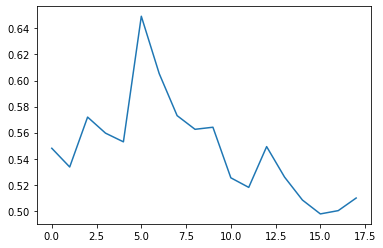

In [16]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()

## Early Stopping Implementation


In [12]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(min_delta=0.001, patience=5, restore_best_weights=True)

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               6144      
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 531,969
Trainable params: 531,969
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='mae', optimizer='adam')

In [17]:
history2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs=500, callbacks=[earlystopping], verbose=1)

Epoch 1/500
5/5 [==============================] - 2s 31ms/step - loss: 4.3845 - val_loss: 1.3043
Epoch 2/500
5/5 [==============================] - 0s 8ms/step - loss: 1.3018 - val_loss: 1.3057
Epoch 3/500
5/5 [==============================] - 0s 7ms/step - loss: 0.9812 - val_loss: 1.0645
Epoch 4/500
5/5 [==============================] - 0s 8ms/step - loss: 0.8308 - val_loss: 0.9612
Epoch 5/500
5/5 [==============================] - 0s 7ms/step - loss: 0.7635 - val_loss: 0.9492
Epoch 6/500
5/5 [==============================] - 0s 7ms/step - loss: 0.8029 - val_loss: 0.9989
Epoch 7/500
5/5 [==============================] - 0s 6ms/step - loss: 0.7092 - val_loss: 0.6937
Epoch 8/500
5/5 [==============================] - 0s 6ms/step - loss: 0.6096 - val_loss: 0.6024
Epoch 9/500
5/5 [==============================] - 0s 7ms/step - loss: 0.5681 - val_loss: 0.5812
Epoch 10/500
5/5 [==============================] - 0s 8ms/step - loss: 0.5594 - val_loss: 0.5404
Epoch 11/500
5/5 [==========

<AxesSubplot:>

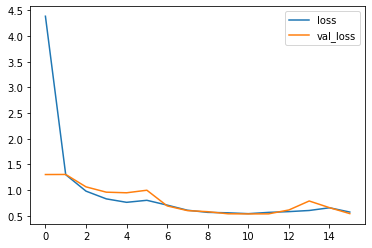

In [21]:
history2_df = pd.DataFrame(history2.history)
history2_df.loc[:,['loss', 'val_loss']].plot()

In [25]:
min_loss = history2_df['val_loss'].min()
print("Minimum validation loss: {}".format(min_loss))

Minimum validation loss: 0.5379458069801331
